<p style='text-align: right;'> <b>UYI 23 November 2021</b> </p>


# INFO 4127
## DESCENT GRADIANT ALGORITHMS 

__GROUP 1 MEMBER'S__:


|Name|Surname|Matricule|Email|
|:--:|:-----:|:-------:|:---:|
|DJIEMBOU TIENTCHEU|Victor Nico|17T2051|nico.djiembou@facsciences-uy1.cm / Viclegranddab@gmail.com|
|KENFACK TEMGOUA|Vanessa|17J2871|vanessa.kenfack@facsciences-uy1.cm / Vanstemgoua21@gmail.com|
|DONGMO NGUIMKENG|BIBICHE LAURE|21S2812|laurenguimkeng2@gmail.com|
|NYA NJIKE|ARMEL|21S2802|Armel.njike@yahoo.com|

___Purpose of the assignment___: 
> * _Be able to implement Gradiant Descent Algorithms_
>> 1. with __Fixed Step__
>> 2. with __Optimal Step__
>> 3. with __Fixed Step using Armijo condition__
>> 4. with __Fixed Step using Wolfe condition__.
> * _Apply an experimental study of each approach_
>> 1. with __Limits explanation__ of each algorithms
>> 2. with __Temporal evaluation__ of each algorithms
>> 3. with __Space evaluation__ of each algorithms
>> 4. with __Data visualization__ of each algorthms outputs.

### INTRODUCTION
The focus here is on the design of numerical methods for solving unconstrained differentiable optimization problems. In other words, the constraint domain X is an open of $R^n$.
Thus, we seek to solve the problem:
$$
(P) =  min_{x in R^n}f(x)
$$

where f is a real-valued function defined on $R^n$ and assumed to be differentiable, or even twice differentiable. 


### General principle of descent methods
General principle of descent methods
Starting from an arbitrarily chosen point x0, a descent algorithm will try to generate a sequence of iterates $(x_k),k in N$ defined by :

$x_{k+1} =x_k +s_kd_k$

and such that :

k in N, $f(x_{k+1})$ less than or equals to $f(x_k)$.

### Gradiant Descent Algorithm environment preparing

#### Import libraries

In [62]:
import sympy as sp # for symbolic mathematic manipulation
import numpy as np # for mathematic utils usage
from sympy.parsing.sympy_parser import parse_expr # convert string to mathematic expression
# implicite 2x to 2*x convertion
from sympy.parsing.sympy_parser import standard_transformations,implicit_multiplication_application 
transformations = standard_transformations + (implicit_multiplication_application,)

import time # for time evaluation

# for plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

#### Define useful methods

##### create symbolic expression function

In [26]:
def toExp(prefix_exp="(x**2)/2 + (7*y**2)/2"):
    """Summary or Description of the Function

    Parameters:
    prefix_exp (string): expression of a function

    Returns:
    toExp(prefix_exp):Returning  a mathematic expression of the function

   """
    return parse_expr(prefix_exp)

In [27]:
toExp()

x**2/2 + 7*y**2/2

##### create symbolic args function

In [25]:
def toArgs(prefix_args="x,y"):
    """Summary or Description of the Function

    Parameters:
    prefix_args (string): suite of caracters separate by <<,>>

    Returns:
    toArgs(prefix_args):Returning  a tuple of mathematical symbole link to caracters passed as parameters

   """
    return sp.symbols(prefix_args)

In [23]:
toArgs()

(x, y)

##### Gradiant function

$$
\mathbf{Gradiant(f)}
=
\frac{d \mathbf{f}}{d \mathbf{x}}
=
\begin{bmatrix}
\frac{\partial f}{\partial x_1}  \\
\vdots  \\
\frac{\partial f}{\partial x_n}
\end{bmatrix}
$$

In [6]:
def gradiant(f, args):
    """Summary or Description of the Function

    Parameters:
    f (expression): expression of function
    args (tuple): differents symbols in expression

    Returns:
    gradiant(f,args):Returning  a matrix (col vector) containing the result of the partial 
    differential of the function following each symbol of the expression

   """
    Df = []
    for var in args:
        Df.append(f.diff(var))
    return sp.Matrix(Df)

In [29]:
gradiant(toExp(),toArgs())

Matrix([
[  x],
[7*y]])

##### Hessian function

$$
\mathbf{Hessian(f)}
=
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 x_2} & \cdots &
\frac{\partial^2 f}{\partial x_1 x_n} \\
\frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots &
\frac{\partial^2 f}{\partial x_2 x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n x_1} & \frac{\partial^2 f}{\partial x_n x_2} & \cdots &
\frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
$$

In [30]:
def hessian(f, args):
    """Summary or Description of the Function

    Parameters:
    f (expression): expression of function
    args (tuple): differents symbols in expression

    Returns:
    hessian(f,args):Returning  a matrix containing the result of the second partial 
    differential of the function following each symbol of the expression

   """
    H = []
    for i in args:
        line = []
        for j in args:
            line.append(f.diff(j).diff(i))
        H.append(line)
    return sp.Matrix(H)

In [31]:
hessian(toExp(),toArgs())

Matrix([
[1, 0],
[0, 7]])

##### Trace Logs function

In [55]:
def traceLogs(s,k,f, norm, X, args):
    """Summary or Description of the Function

    Parameters:
    s (float): step descent
    args (tuple): differents symbols in expression
    f (expression): mathematic expression of the function studied
    X (matrix): coordinate of current point
    norm (float): norm of a vector field or absolute value of a scalar field 

    Returns:
    traceLogs(s,k,f, norm, X, args):Returning  a console information about current iteration

   """
    X_S = [] #X[k]
    info = ""
    for i in range(len(args)):
        info+= str(args[i])+":  "+str(X[i]) +" "
        X_S.append((args[i], X[i]))
    print("""k: {}   f(xk, yk): {}  ||∇f(xk,yk)||: {} sk: {}  {}   """.format(k, f.subs(X_S), norm, s,info))

#### Preview of our study function

Text(0.5, 0, 'parameter 2 : y')

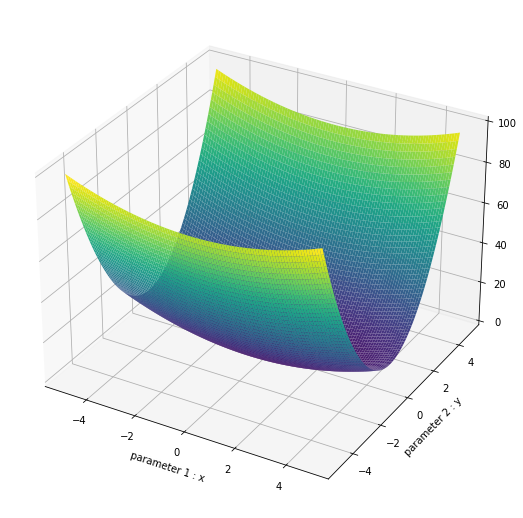

In [36]:
def h(x, y):
    return (x**2)/2 + (7*y**2)/2

fig = plt.figure()
fig.set_size_inches(9, 7, forward=True)
#ax = Axes3D(fig,azim=-19, elev=19)
ax = Axes3D(fig)
a = np.arange(-5,5,0.1)
b = np.arange(-5,5,0.1)
A,B = np.meshgrid(a,b)
C = h(A,B)
#ax.plot_wireframe(A,B,C,rstride=1, cstride=1)
ax.plot_surface(A,B,C,rstride=1, cstride=1,cmap = plt.cm.viridis)
plt.xlabel("parameter 1 : x")
plt.ylabel("parameter 2 : y")

#### Define Fixed Step Method

In [130]:
def fixedStep(f, args, s, init_point, e = 10**(-5), iter=100 ):
    """Summary or Description of the Function

    Parameters:
    s (float): step descent
    args (tuple): differents symbols in expression
    f (expression): mathematic expression of the function studied
    init_point (list): coordinate of init point where we start to find the optimum of the function
    e (float): optimum search precision
    iter (int): limit of iteration to find optimum

    Returns:
    fixedStep(f, args, s, init_point, e, iter):Returning  an approximation of optimum of the function

   """
    Df = gradiant(f,args) #calcul differential of the function f
    X = sp.Matrix(init_point) #convert init_point in matrix n*m 
    
    k = 0
    start_time = time.time()
    while (k < iter): # first stop condition
        X_S = [] #X[k]
        for i in range(len(args)):
            X_S.append((args[i], X[i])) #link args to init value to substitude in Gradiant matrix
        
        grad = [] #Lf(X[k])
        for expr in Df:
            grad.append(expr.subs(X_S)) #substitude values in gradiant matrix
        grad = sp.Matrix(grad) # convert the result in matrix
        
        if ((grad.norm()) < e): #break if ||lf(X[k])|| < precision is second stop condition
            break
            
        X = sp.Matrix(X - s*grad) #calcul the X[k+1] = X[k]-s*Lf(X[k])
        #traceLogs(s,k,f, grad.norm(), X, args)
        #ax.scatter(X[0],X[1],h(X[0],X[1]), marker="o", color="#00FF00")
        #plt.draw()
        #plt.pause(0.05)
        k += 1
    end_time = time. time()
    time_elapsed = (end_time - start_time)
    X_S = [] #X[k]
    for i in range(len(args)):
        X_S.append((args[i], X[i])) #link args to init value to substitude in Gradiant matrix
        

    print('FixedStep function has taken : {} second for {} iteration, image of function {} and the result is :'.format(time_elapsed,k,f.subs(X_S)))
    return X #return the last X

In [131]:
fixedStep(toExp(),toArgs(),0.2,[7,1.5])

FixedStep function has taken : 0.46828269958496094 second for 61 iteration, image of function 3.68251476978936E-11 and the result is :


Matrix([
[  8.58197502884897e-6],
[-7.97536797470959e-25]])

In [132]:
fixedStep(toExp(),toArgs(),0.1,[7,1.5])

FixedStep function has taken : 0.9654810428619385 second for 100 iteration, image of function 1.72849438162055E-8 and the result is :


Matrix([
[0.000185929792213112],
[7.73066281098007e-53]])

In [133]:
fixedStep(toExp(),toArgs(),0.15,[7,1.5])

FixedStep function has taken : 1.209404706954956 second for 83 iteration, image of function 4.70660501189075E-11 and the result is :


Matrix([
[   9.70216987265298e-6],
[-1.55096364853682e-108]])

In [134]:
fixedStep(toExp(),toArgs(),0.25,[7,1.5])

FixedStep function has taken : 0.1767120361328125 second for 49 iteration, image of function 1.84592303558624E-11 and the result is :


Matrix([
[ 5.28566879331809e-6],
[-1.13264331285388e-6]])

In [135]:
fixedStep(toExp(),toArgs(),0.3,[7,1.5])

FixedStep function has taken : 0.5847201347351074 second for 100 iteration, image of function 1495504052.12611 and the result is :


Matrix([
[2.26413355673733e-15],
[    20670.9185097332]])


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:40rem;margin:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">Name</th>
    <th class="tg-0pky" colspan="5">Values</th>
  </tr>
</thead>
<tbody>
       <tr>
       <td>s</td>
       <td>0.2</td>
       <td>0.1</td>
       <td>0.15</td>
       <td>0.25</td>
       <td>0.3</td>
   </tr>
   <tr>
       <td>Elapsed times</td>
       <td>0.04381513595581055</td>
       <td>0.493283748626709</td>
       <td>0.34850406646728516</td>
       <td>0.2332019805908203</td>
       <td>0.399183988571167</td>
   </tr>
   <tr>
       <td>Nb iterations</td>
       <td>61</td>
       <td>100</td>
       <td>83</td>
       <td>49</td>
       <td>100</td>
   </tr>
   <tr>
       <td>Nb of exact significant numbers.</td>
       <td>-11</td>
       <td>-8</td>
       <td>-11</td>
       <td>-11</td>
       <td>5</td>
   </tr>
</tbody>
</table>

#### Define Optimal Step Method

__function__ to solve: optimal setp s_k solution of :
$$
 min f (x_k + sd_k )
$$

In [90]:
def s_k(xk,dk,args,f):
    """Summary or Description of the Function

    Parameters:
    xk (matrix): current point
    dk (matrix): direction of greatest gradient
    f (expression): mathematic expression of the function studied
    args (tuple): symbols inside function expression

    Returns:
    s_k(xk,dk,args,f):Returning  optimal step

   """
    s = sp.symbols("s") # define our symbol arg
    X = sp.Matrix(xk - s*dk) # calcul Xk+sdk to get our Xk+1
    X_K = [] #X[k]
    for i in range(len(args)):
        X_K.append((args[i], X[i]))
    phi = f.subs(X_K)
    grad = gradiant(phi,('s'))
    return sp.solve(grad,s)[s]

In [136]:
def optimalStep(f, args, init_point, e = 10**(-5), iter=1000 ):
    """Summary or Description of the Function

    Parameters:
    args (tuple): differents symbols in expression
    f (expression): mathematic expression of the function studied
    init_point (list): coordinate of init point where we start to find the optimum of the function
    e (float): optimum search precision
    iter (int): limit of iteration to find optimum

    Returns:
    optimalStep(f, args, init_point, e, iter):Returning  an approximation of optimum of the function

   """
    Df = gradiant(f,args) #calcul gradiant of the function
    X = sp.Matrix(init_point) #convert init_point in matrix n*m 
    
    k = 0
    start_time = time.time()
    while (k < iter):
        X_S = [] #X[k]
        for i in range(len(args)):
            X_S.append((args[i], X[i])) #link coord to init value to substitude in Gradiant matrix
        
        grad = [] #Lf(X[k])
        for expr in Df:
            grad.append(expr.subs(X_S)) #substitude values in gradiant matrix
        grad = sp.Matrix(grad) # convert the result in matrix
        
        if ((grad.norm()) < e): #break if ||lf(X[k])|| < precision
            break
            
        # determine sk
        s = s_k(X,grad,args,f)
        #print("OKK")
        #break
        X = sp.Matrix(X - s*grad) #calcul the X[k+1] = X[k]-s*Lf(X[k])
        #ax.scatter(X[0],X[1],h(X[0],X[1]), marker="o", color="#00FF00")
        #plt.draw()
        #plt.pause(0.05)
        #traceLogs(s,k,f, grad.norm(), X, args)
        k += 1
    end_time = time. time()
    time_elapsed = (end_time - start_time)
    X_S = [] #X[k]
    for i in range(len(args)):
        X_S.append((args[i], X[i])) #link args to init value to substitude in Gradiant matrix
        

    print('FixedStep function has taken : {} second for {} iteration, image of function {} and the result is :'.format(time_elapsed,k,f.subs(X_S)))
    return X #return the last X

In [138]:
optimalStep(toExp(),toArgs(),[7,1.5])

FixedStep function has taken : 3.736733913421631 second for 43 iteration, image of function 2.50227013205719E-11 and the result is :


Matrix([
[ 6.85985549474891e-6],
[-6.53319570928464e-7]])

In [139]:
optimalStep(toExp(),toArgs(),[7,1.5],10**(-4))

FixedStep function has taken : 3.9369301795959473 second for 37 iteration, image of function 1.22564117767989E-9 and the result is :


Matrix([
[ 4.80097608837455e-5],
[-4.57235817940434e-6]])

In [140]:
optimalStep(toExp(),toArgs(),[7,1.5],10**(-6))

FixedStep function has taken : 4.928955078125 second for 51 iteration, image of function 1.39624615510908E-13 and the result is :


Matrix([
[  5.1242329683565e-7],
[-4.88022187462517e-8]])

In [141]:
optimalStep(toExp(),toArgs(),[7,1.5],10**(-7))

FixedStep function has taken : 3.9313840866088867 second for 57 iteration, image of function 2.85057740760852E-15 and the result is :


Matrix([
[ 7.32173979567855e-8],
[-6.97308551969381e-9]])

In [142]:
optimalStep(toExp(),toArgs(),[7,1.5],10**(-8))

FixedStep function has taken : 4.140999794006348 second for 65 iteration, image of function 1.59059875040037E-17 and the result is :


Matrix([
[  5.46925521615783e-9],
[-5.20881449157889e-10]])


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:40rem;margin:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">Name</th>
    <th class="tg-0pky" colspan="5">Values</th>
  </tr>
</thead>
<tbody>
       <tr>
       <td>e</td>
       <td>10**(-5)</td>
       <td>10**(-4)</td>
       <td>10**(-6)</td>
       <td>10**(-7)</td>
       <td>10**(-8)</td>
   </tr>
   <tr>
       <td>Elapsed times</td>
       <td>3.736733913421631</td>
       <td>3.9369301795959473</td>
       <td>4.928955078125</td>
       <td>3.9313840866088867</td>
       <td>4.140999794006348</td>
   </tr>
   <tr>
       <td>Nb iterations</td>
       <td>43</td>
       <td>37</td>
       <td>51</td>
       <td>57</td>
       <td>65</td>
   </tr>
   <tr>
       <td>Nb of exact significant numbers.</td>
       <td>-11</td>
       <td>-9</td>
       <td>-13</td>
       <td>-15</td>
       <td>-17</td>
   </tr>
</tbody>
</table>

#### Define Fixed Step Method with Armijo condition

__Armijo Condition__:
$$
 f(x+sd)<=f(x)+\gamma s(\frac{\partial \mathbf{f}}{\partial X} d),0<\gamma<1
$$

In [92]:
def MeriteFunction(dk,args,f):
    """Summary or Description of the Function

    Parameters:
    dk (matrix): direction of greatest gradient
    f (expression): mathematic expression of the function studied
    args (tuple): symbols inside function expression

    Returns:
    MeriteFunction(dk,args,f):Returning  expression of merite function

   """
    s = sp.symbols("s") # define our symbol arg
    X = sp.Matrix(args) + s*dk # calcul Xk+sdk to get our Xk+1
    #print(function)
    #print(X)
    X_S = [] #X[k]
    for i in range(len(args)):
        X_S.append((args[i], X[i]))
    
    M = f.subs(X_S)
    return M

In [100]:
def ArmijoSuffCond(gk,args,f,e=10**(-4)):
    """Summary or Description of the Function

    Parameters:
    gk (matrix): function gradient
    f (expression): mathematic expression of the function studied
    args (tuple): symbols inside function expression
    e (float): precision of optimum armijo condition search

    Returns:
    ArmijoSuffCond(gk,args,f,e):Returning expression of second member of Armijo condition

   """
    s = sp.symbols("s") # define our symbol arg
    X = f + e*s*((sp.transpose(gk)*(-gk))[0]) # calcul F(X)+esDF(X)Tdk 
    M = MeriteFunction(-gk,args,f)
    solu = sp.solve(M-X, s)
    return solu

In [113]:
def ArmijoFixedStep(f, args, init_point, e = 10**(-5), iter=100 ):
    """Summary or Description of the Function

    Parameters:
    gk (matrix): function gradient
    f (expression): mathematic expression of the function studied
    args (tuple): symbols inside function expression
    e (float): precision of optimum search

    Returns:
    ArmijoOptimalStep(gk,args,f,e):Returning expression of second member of Armijo condition

   """
    Df = gradiant(f,args) #calcul gradiant of the function
    X = sp.Matrix(init_point) #convert init_point in matrix n*m 
    
    p = sp.Matrix(ArmijoSuffCond(Df,args,f))
    k = 0
    start_time = time.time()
    while (k < iter):
        X_S = [] #X[k]
        for i in range(len(args)):
            X_S.append((args[i], X[i])) #link coord to init value to substitude in Gradiant matrix
        
        grad = [] #Lf(X[k])
        for expr in Df:
            grad.append(expr.subs(X_S)) #substitude values in gradiant matrix
        grad = sp.Matrix(grad) # convert the result in matrix
            
        # determine sk
        s = (p[1].subs(X_S)-p[0].subs(X_S))/2
        #print("OKK")
        #break
        
        N = sp.Matrix(X - s*grad) #calcul the X[k+1] = X[k]-s*Lf(X[k])
        X_S1 = [] #X[k]
        for i in range(len(args)):
            X_S1.append((args[i], N[i]))
        #ax.scatter(X[0],X[1],h(X[0],X[1]), marker="o", color="#00FF00")
        #plt.draw()
        #plt.pause(0.05)
        #traceLogs(s,k,f, grad.norm(), X, args)
        
        
        if (abs(f.subs(X_S1)-f.subs(X_S)) < e*(1+abs(f.subs(X_S)))): #break if ||f(xk+1)-f(x)|| < e*(1+|f(xk))
            break
        X = N
        k += 1
    end_time = time. time()
    time_elapsed = (end_time - start_time)
    print('ArmijoFixedStep function has taken : {} second for {} iteration and the result is :'.format(time_elapsed,k))

        
    return X #return the last X

In [114]:
ArmijoFixedStep(toExp(),toArgs(),[7,1.5])

ArmijoFixedStep function has taken : 0.13123011589050293 second for 22 iteration and the result is :


Matrix([
[0.00555336856323215],
[ 0.0011923807092541]])